# Alexander Looi Midterm Project Write Up.

In [2]:
# import some things to do accuracy testing of the jarvis bot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

### Measuring Jarvis' Accuracy

To test jarvis' accuracy I decided to conduct two analysis, both of which tell a similar story with different details. I used a confusion matrix to see what jarvis was predicting correctly and to see what jarvis was predicting incorrectly. If something is being predicted incorrectly, we can use the matrix to see if jarvis is incorrectly in a "consistent" way. Thus, if the incorrect predictions are "unpredictable" then we may need many more training examples to to help jarvis categorize the different classes more specifically. If the incorrect predictions are more predictable, then we may a smaller volume of training examples to help jarvis specify between a couple of classes.

The second analysis I did is a more broad measure, using sklearn's classification_report() function. The two metrics I focus on are precision and recall. Here precision is the number of true positives (correct predictions) over the total number of test examples. Recall is the total number of true positives over the all relevant elements (all real true elements). A high recall indicates you don't miss a true positive. Where as high precision indicates how well you predicted corrected out of all test cases. Finally, the f1 score balances theses two measures because these two metrics can not be both perfect at the same time.

In testing I tried to give phrases that were delibrately confusing. Often I tried to include words that could make a phrase ambiguous as to which class it belonged to. For example, "when will the pizza arrive", "when will the rain stop". Each of these two phrases belong to pizza and weather (though you could debate this), they both have an element of time to them.  I wanted to see how well jarvis would do with abiguity in test phrasing.

In [6]:
# confusion matrix
y_pred = ['greet', 'greet', 'greet', 'pizza', 'pizza', 'joke', 
          'joke', 'greet', 'weather', 'weather', 'greet', 'weather', 
          'weather', 'pizza', 'weather', 'joke', 'time', 'time', 'pizza', 
          'pizza', 'time']
y_true = ['greet', 'greet', 'pizza', 'pizza', 'pizza', 'joke', 'joke',
         'joke', 'weather', 'weather', 'greet', 'pizza', 'pizza', 
          'pizza', 'weather', 'joke', 'time', 'time', 'time', 'time',
         'time']
classes = ['weather', 'time', 'pizza', 'greet', 'joke']
# create a raw confusion matrix table
cm = confusion_matrix(y_true, y_pred, labels=classes)
# create a normalized confusion matrix
cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

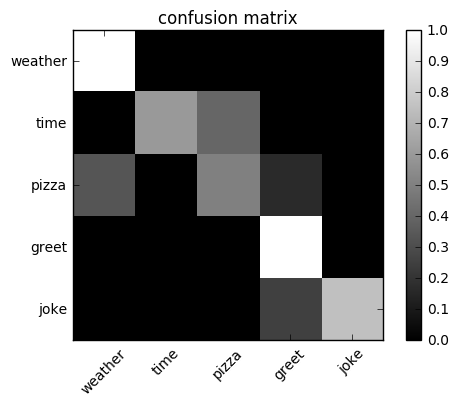

In [7]:
# plot a confusion matrix with a color map
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.imshow(cm2, interpolation='nearest', cmap='gray')
plt.title('confusion matrix')
plt.colorbar()
plt.show()

In [8]:
# print a classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      greet       0.60      1.00      0.75         3
       joke       1.00      0.75      0.86         4
      pizza       0.60      0.50      0.55         6
       time       1.00      0.60      0.75         5
    weather       0.60      1.00      0.75         3

avg / total       0.77      0.71      0.71        21



Looking at both the confusion matrix and the classification report the model appears to predict weather and greet classes well (high recall). However, the precision is not great since it seems to be confused with other classes. Pizza was interestingly confused with the weather class often specfically with the phrases "who puts pineapple on their pies", and "who puts pineapple on their pizza". I thought that the word pizza would tell jarvis that is is part of the pizza class. However, obviously this was not the case. Other classes jarvis had trouble with with were pizza and time. Often getting the two confused. This is partly because of the design of the testing phrases where the phrases included an element of time and pizza in it (e.g. "when is the pizza arriving" or "when is the food arriving"). Using this "confusion" phrases led to jarvis having poor precision and recall for the pizza class. Jarvis had good precision with time, but that again is partly due to the "confusing" phrases I used, where jarvis would continually predict time instead of pizza. 

Jarvis was best at predicting the joke class. Here we had realtively high precision and recall. I think is partly because the joke class is a pretty distinct class where phrases tend to be very different from the others. This could also be a factor of my test phrases and training phrases being distinctly different from the other classes. It is very possible to have jokes about time and pizza, but I simply did not test or train on these. 

### How to improve jarvis

To improve jarvis, I think we need to include more than $\approx 50$ training examples. Definitely, should find a large "simple conversion corpus" to train the bot on. With my simple short training phrases words that I personally would not associate with any particular class (is, and, how, why) could be associated, by jarvis to a particular class. More data is needed to help jarvis "de-associate" these words to a particulare class. Second, helping jarvis learn context could help particularly when words appear together in a sentence or if they appear directly next to each other, context for words is very important in human language. Lastly, we're forcing jarvis to associate a phrase with a single class, I think I've demonstrated to some degree that it's possible for a phrase to belong to two classes (certainly this is true in human language). So a new model that could return multiple classes per document I think would help both the  prediction and performance of jarvis.

### Post Mortem

For me I kept going down the wrong "avenue" during this project, though I think this is more a problem with me not reading some of the instructions and looking over the provided material thoroughly enough. I thought I was suppose to use websocket to put jarvis in different modes, and was thoroughly confused with how to do that given that I found the websocket documentation lacking. However, once I figured how things were laid out, the rest of the assignment was not too bad. This assignment definitely helped solidify my understanding of python object oriented programming, particularly the usefulness of the local "jarvis" variables. I also like the idea of pickling data. I can see this would be useful if simulations are long, data sets are large, or both. You can quickly pickle data to be used later, and avoid having to rerun simulations.

I actually found this assignment was pretty fun!  It was partcularly rewarding once jarvis was working and could "talk" to you. This jarvis bot I think could be fun to interact with if we can make it more sophisticated. 